In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Student Performance Data Set/student-por.csv')

# Display first few rows
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans


In [ ]:
features = ['studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
df_cluster = df[features]


In [ ]:
df_cluster = df_cluster.dropna()


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)  # You can change number of clusters
df['Cluster'] = kmeans.fit_predict(scaled_data)


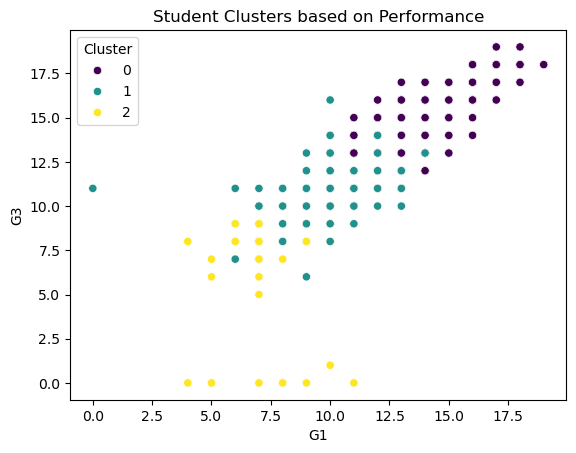

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['G1'], y=df['G3'], hue=df['Cluster'], palette='viridis')
plt.title("Student Clusters based on Performance")
plt.xlabel("G1")
plt.ylabel("G3")
plt.show()


In [ ]:
df.groupby('Cluster')['G3'].mean()


Cluster
0    14.881579
1    11.088146
2     7.456522
Name: G3, dtype: float64

In [ ]:
import pandas as pd

# Load the dataset (replace with your actual dataset path)
test_data = pd.read_csv('Student Performance Data Set/student-por.csv')


In [ ]:
# Verify the dataset structure
print(test_data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


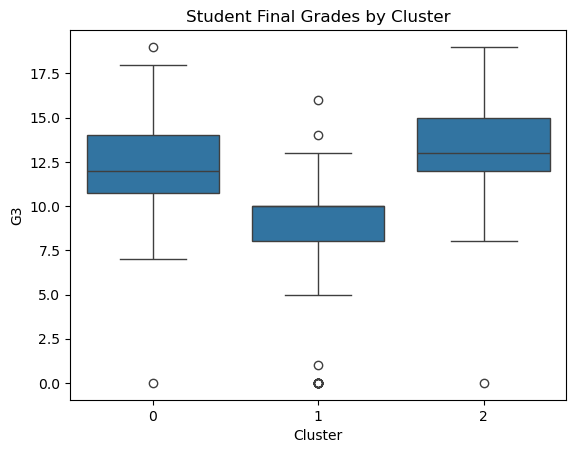

Recommended Learning Path: Focus on time management and regular study habits.


In [ ]:
# AI-Driven Personalized Learning Path

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("Student Performance Data Set/student-por.csv")

# Step 2: Preprocessing
# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 3: Feature Selection (excluding final grade initially)
features = df.drop(columns=["G3"])
X = StandardScaler().fit_transform(features)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 5: Analyze Clusters
sns.boxplot(x='Cluster', y='G3', data=df)
plt.title("Student Final Grades by Cluster")
plt.show()

# Step 6: Recommend strategy based on cluster
def recommend_path(cluster_id):
    if cluster_id == 0:
        return "Focus on time management and regular study habits."
    elif cluster_id == 1:
        return "You are doing well. Continue your current learning strategy."
    elif cluster_id == 2:
        return "Consider attending extra tutorials or group studies."
    else:
        return "No recommendation available."

# Step 7: Predict cluster for a new student (example input)
# Replace with actual student data
example_student = df.iloc[0:1].drop(columns=['G3', 'Cluster'])
example_scaled = StandardScaler().fit_transform(features)
example_cluster = kmeans.predict(example_scaled[0:1])[0]

print(f"Recommended Learning Path: {recommend_path(example_cluster)}")


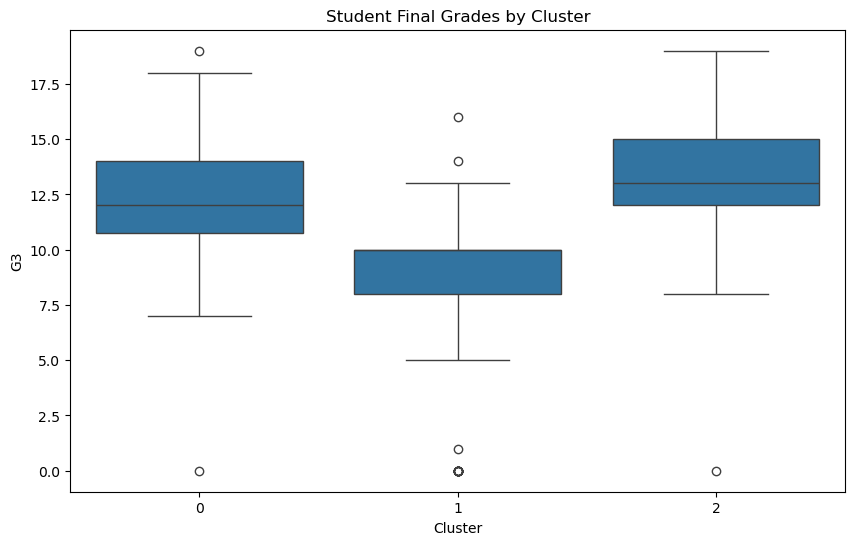

Student 10 is in Cluster 2
Recommended Learning Path: ['Moderate revision', 'Group discussions', 'Concept clarity exercises']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("Student Performance Data Set/student-por.csv")  # Use full path if needed

# Step 2: Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 3: Select features (excluding final grade)
X = df.drop(['G3'], axis=1)

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Step 6: Visualize clusters vs final grade
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='G3', data=df)
plt.title("Student Final Grades by Cluster")
plt.show()

# Step 7: Recommend path based on cluster
def recommend_path(cluster):
    if cluster == 0:
        return ["Focus on core concepts", "Revise basics", "Daily practice"]
    elif cluster == 1:
        return ["Advanced topics", "Project-based learning", "Competitive preparation"]
    else:
        return ["Moderate revision", "Group discussions", "Concept clarity exercises"]

# Step 8: Test a student
student_index = 10  # You can try changing this
student_features = X_scaled[student_index].reshape(1, -1)
student_cluster = kmeans.predict(student_features)[0]

# Output the recommendation
print(f"Student {student_index} is in Cluster {student_cluster}")
print(f"Recommended Learning Path: {recommend_path(student_cluster)}")


In [ ]:
# Step 7: Recommend learning path based on cluster
def recommend_path(cluster_label):
    if cluster_label == 0:
        return "Focus on practice problems, peer discussions, and time management workshops."
    elif cluster_label == 1:
        return "Start with foundational topics, watch video tutorials, get 1-on-1 mentoring."
    elif cluster_label == 2:
        return "Advance to competitive courses, project-based learning, and mentoring peers."
    else:
        return "No recommendation available."

# Pick a student to test the recommendation
student_index = 10  # You can change this index
student_features = X_scaled[student_index].reshape(1, -1)
student_cluster = kmeans.predict(student_features)[0]

print(f"Student {student_index} is in Cluster {student_cluster}")
print("Recommended Learning Path:", recommend_path(student_cluster))


Student 10 is in Cluster 2
Recommended Learning Path: Advance to competitive courses, project-based learning, and mentoring peers.


In [ ]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Define learning path recommendations for each cluster
def recommend_path(cluster):
    if cluster == 0:
        return "Moderate support with focus on foundational concepts and peer study groups."
    elif cluster == 1:
        return "Extra academic support, regular feedback, and simpler learning modules."
    else:
        return "Advance to competitive courses, project-based learning, and mentoring peers."

# Add the recommendation column
df['Learning_Path'] = df['Cluster'].apply(recommend_path)

# Display the first few rows
df[['Cluster', 'Learning_Path']].head()


,Cluster,Learning_Path
0,0,Moderate support with focus on foundational co...
1,0,Moderate support with focus on foundational co...
2,0,Moderate support with focus on foundational co...
3,2,"Advance to competitive courses, project-based ..."
4,0,Moderate support with focus on foundational co...


In [ ]:
# Save to CSV
df.to_csv("student_clustered_recommendations.csv", index=False)
print("Saved successfully!")


Saved successfully!


In [ ]:
import joblib

# Save the models
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Models saved!")


Models saved!


In [ ]:
# Example of feedback collection in Python

def collect_feedback():
    print("Please rate the recommended learning path (1 to 5):")
    rating = int(input())  # Rating on scale of 1 to 5
    
    print("Please provide any comments or suggestions:")
    comments = input()  # Open-ended feedback

    feedback = {
        "rating": rating,
        "comments": comments
    }
    
    # You can save this feedback to a database or file
    save_feedback(feedback)

def save_feedback(feedback):
    # Save feedback to a file or database (for simplicity, we will store it in a list here)
    with open('feedback.txt', 'a') as f:
        f.write(f"Rating: {feedback['rating']}, Comments: {feedback['comments']}\n")
    print("Thank you for your feedback!")

# Call the function to collect feedback
collect_feedback()


Please rate the recommended learning path (1 to 5):
